# <span style="color:#0b486b">FIT3181 S2 2023 - ASSIGNMENT 1</span>

<font size="+1">Due: <span style="color:red">[11:59pm, 08 September 2023]</span>  (Friday)</font>

<font size="+1">**Important note:**</font> This is an **individual** assignment. It contributes **25%** to your final mark. Read the assignment instruction carefully.

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **LIM**  <br/>
Firstname: **YU JIN**    <br/>
Student ID: **32637888**    <br/>
Email: **ylim0076@student.monash.edu**    <br/>
Your tutorial time: **FRIDAY 8AM**    <br/>
***

## <span style="color:#0b486b">Instruction</span>

This notebook has been prepared for your to complete Assignment 1. The theme of this assignment is about practical machine learning knowledge and skills in deep neural networks, including feedforward and convolutional neural networks. Some sections have been partially completed to help you get
started. **The total marks for this notebook is 100**.

* Before you start, read the entire notebook carefully once to understand what you need to do. <br/>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL** or **INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br>

This assignment contains **three** parts:

* Part 1: Questions on theory and knowledge on machine learning and deep learning **[30 points]**
* Part 2: Coding assessment on TensorFlow for Deep Neural Networks (DNN) **[30 points]**
* Part 3: Coding assessment on TensorFlow for Convolution Neural Networks (CNN) **[40 points]**

**Hint**: This assignment was essentially designed based on the lectures and tutorials sessions covered from Week 1 to Week 5. You are strongly recommended to go through these contents thoroughly which might help you to complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. 

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:

1. **A1_Part1_Solutions.ipynb, A1_Part2_Solutions.ipynb, A1_Part3_Solutions.ipynb**: these are your Python notebook solution source files.
2. **A1_Part1_Solutions.html, A1_Part2_Solutions.html, A1_Part3_Solutions.html**: these are the output of your Python notebook solution *exported* in HTML format.
3. Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

**You can run your codes on Google Colab. In this case, you need to capture the screenshots of your Google Colab model training and put in corresponding places in your Jupyter notebooks. You also need to store your trained models to folder <span style="color:red; font-weight:bold">*./models*</span> with recognizable file names (e.g., Part3_Sec3_2_model.h5).**

## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red">[Total marks for this part: 30 points]</span></div>

The first part of this assignment is for you to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and labs from weeks 1 to 2**. Going through these materials before attempting this part is highly recommended.

**Numpy** is possibly being used in the following questions. You need to import it here.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models, layers
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
%matplotlib inline
np.random.seed(123)
tf.random.set_seed(123)

### <span style="color:#0b486b">Question 1.1: Activation Functions</span>
Activation function plays an important role in modern Deep NNs. In this question, we will explore some of them to get deeper understanding of their characteristics and their advantages.

**(a)** Given the Exponential Linear Unit activation function: $$\text{ELU}\left(x\right)=\begin{cases}\alpha\,(e^x-1) & \text{if}\,x<0\ (\alpha\ \text{is a hyper-parameter})\\x & \text{otherwise}\end{cases}$$

State its output range, find its derivative (show your steps), and plot the activation fuction and its derivative.
<div style="text-align: right"><span style="color:red">[2 points]</span></div>

**(b)** In literature, there are a wide range of activation functions that have been proposed. Do a research and select two (2) activation functions that were not discussed in the lecture (including `ReLU`, `sigmoid`, and `tanh`). For each of the selected activation function, do the following:

- Find the research paper which propose the activation function.
- Write a brief summary of the author's motivation which leads to the activation function (max 150 words).
- Write a brief summary of advantages of the activation function (max 150 words).

<div style="text-align: right"><span style="color:red">[6 points]</span></div>

(a) Define the ELU activation function as a TensorFlow function

In [2]:
def elu(z,alpha=1):
    return tf.where(z<0,alpha*(tf.math.exp(z)-1),z)

derivation of the ELU function:

ELU = { a(e^x-1), x<0 ; 
            x   , x >= 0
      }

d/dx(ELU) = { ae^x , x < 0 ;
                1 , x >= 0 
            }

Plot of the ELU activation function:

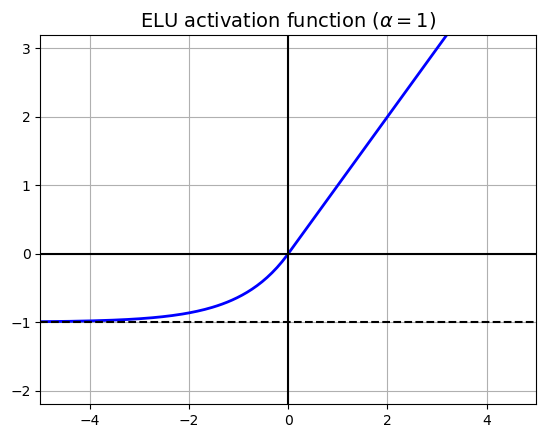

In [3]:
z = np.linspace(-5, 5, 200)
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

output range of ELU activation function = (-1,+inf)

Plot the gradient of ELU function

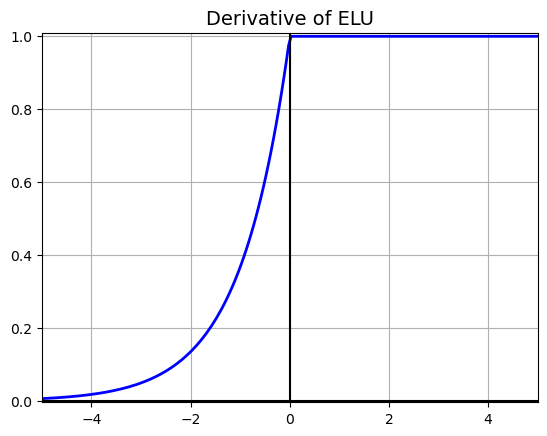

In [4]:
z = np.linspace(-5, 5, 200)
with tf.GradientTape(persistent=True) as g:
    x = tf.Variable(z)
    y = elu(x)
grads = g.gradient(y,x)
plt.plot(z, grads.numpy(), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-5, 5], 'k-')
plt.grid(True)
plt.title(r"Derivative of ELU", fontsize=14)
plt.axis([-5, 5, min(grads.numpy())- 1E-2, max(grads.numpy()) + 1E-2])
plt.show()

Swish Activation function

Research paper: "Swish: A Self-Gated Activation Function" by Prajit Ramachandran, Barret Zoph, and Quoc V. Le (2017).

Motivation: The author's quest to identify an activation function that blends sigmoid or tanh's smoothness and differentiability with ReLU's quick convergence served as their driving force. It was suggested that Swish self-gate its production, potentially making it more durable than ReLU. The Swish function may learn the best activation for a particular input during training thanks to this self-gating mechanism, which increases learning effectiveness.

Advantages: 
On a variety of deep learning tasks, such as image classification and natural language processing, Swish has been demonstrated to outperform ReLU. It is a valuable alternative activation function because it reduces the problems of dead neurons and vanishing gradients, improving training effectiveness.

Parametric Rectified Linear Unit (PreLU)

Research paper: "Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification" by Kaiming He, Xiangyu Zhang, Shaoqing Ren, and Jian Sun (2015).

Motivation:
To overcome the drawback of classic ReLU units, which can experience the "dying ReLU" issue, where neurons may become dormant during training, PReLU was developed. Better feature learning and the prevention of dying ReLUs are both made possible by PReLU, which enables the learning of the slope of the activation function during training.

Advantages:
By reducing the drawbacks of ReLU, PReLU has been shown to reliably enhance the training of deep neural networks. It adapts a slope for every neuron that it learns, making it appropriate for networks with various activation patterns. In order to increase model accuracy and convergence speed, PReLU has been notably successful in convolutional neural networks (CNNs) and deep architectures for image recognition.

### <span style="color:#0b486b">Question 1.2: Feed-forward neural networks</span>
Assume that we feed a data point $x$ with a ground-truth label $y=3$ _(with index starting from 1 as in the lecture)_ to the feed-forward neural network with the ReLU activation function at hidden layers as shown in the following figure:

<img src="Figures/Q2_P1_S2_2023.png" width="600" align="center"/>

**(a)** What is the numerical value of the latent presentation $h^1(x)$
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

**(b)** What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

**(c)** What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

**(d)** What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

**(e)** What is the predicted class? Is it a correct or incorrect prediction?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

**(f)** What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div> 

**(g)** Assume that we are applying the label smoothing technique (i.e.,  [link for main paper](https://papers.nips.cc/paper/2019/file/f1748d6b0fd9d439f71450117eba2725-Paper.pdf) from Goeff Hinton) with $\alpha = 0.1$. What is the relevant loss caused by the feed-forward neural network at $(x,y)$?
<div style="text-align: right"><span style="color:red">[2 point]</span></div> 


**You need to show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your numpy code for your computation.**

In [5]:
# (a)
x = [[1],[-1],[0]]
w1 = [[1, -1,1], [1, -1,-1],[2,-1,2],[-1,-2,1]]
b1 = [[1],[0],[1],[0]]
y1 = np.matmul(w1,x) + b1
print(y1)

[[3]
 [2]
 [4]
 [1]]


In [6]:
# (b)
w2 = [[1, -1,-1,2], [1, -1,1,-1],[1,2,-1,2]]
b2 = [[-1],[1],[0]]
y2 = np.matmul(w2,y1) + b2
print(y2)

[[-2]
 [ 5]
 [ 5]]


In [7]:
# (c)
w3 = [[1, -2,1], [1,2,-1],[-1,1,-1]]
b3 = [[4],[-2],[2]]
y3 = tf.matmul(w3,y2) + b3
print(y3)

tf.Tensor(
[[-3]
 [ 1]
 [ 4]], shape=(3, 1), dtype=int32)


In [8]:
# (d)
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)
s_max = softmax(y3)
print(s_max)
np.argmax(s_max, 0)

[[8.67881295e-04]
 [4.73847131e-02]
 [9.51747406e-01]]


array([2], dtype=int64)

(e) prediction = 3 , same with ground truth = 3. Hence, correct prediction

In [9]:
# (f)
y_true = [0,0,1]
def cross_entropy(y_pred, y_true):
 
    loss = 0
    for i in range(len(y_pred)):
        loss = loss + (-1 * y_true[i]*np.log(y_pred[i]))
 
    return loss
ce_loss = cross_entropy(s_max,y_true)
print(ce_loss)

[0.04945561]


In [10]:
tf.keras.losses.binary_crossentropy(
                  y_true, s_max,
                  from_logits=False,
                  label_smoothing=0.1)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2.46783344, 1.09886235, 1.98765677])>

In [12]:
# (g)
smth_loss = 0
alpha = 0.1
for i in range(len(y_true)):
    smth_loss += -((1 - alpha)*y_true[i]+alpha/3)*np.log(s_max[i])
print(smth_loss)

[0.38278894]


### <span style="color:#0b486b">Question 1.3: Back propagation</span>
Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. 

The architecture is as follows: $3 (Input)\rightarrow4(LeakyReLU)\rightarrow 3(Output)$ (see figure below). Also note that the model parameters are randomly generated.

<img src="Figures/Q3_P1_S2_2023.png" width="500" align="center"/>

We then feed a feature vector $x=\left[\begin{array}{ccc} 1 & -1 & 0\end{array}\right]^{T}$ with ground-truth label $y=3$ to the above network.

**You need to show both formulas, numerical results, and your numpy code for your computation for earning full marks.**

**(a)** Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$?
<div style="text-align: right"><span style="color:red">[2 point]</span></div>

**(b)** What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$
<div style="text-align: right"><span style="color:red">[3 points]</span></div>

**(c)** What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$? 
<div style="text-align: right"><span style="color:red">[3 points]</span></div>

**(d)** Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[2 points]</span></div>

In [13]:
# Given data
x = np.array([[1], [-1], [0]])  # Input feature vector
y = 3  # Ground-truth label

# Initialize parameters using student ID
np.random.seed(32637888)
W1 = np.random.randn(4, 3)  # Layer 1 weights
b1 = np.random.randn(4, 1)   # Layer 1 biases
W2 = np.random.randn(3, 4)  # Layer 2 weights
b2 = np.random.randn(3, 1)   # Layer 2 biases

# Forward pass
z1 = np.dot(W1, x) + b1  # Linear combination for Layer 1
h1 = np.maximum(0, z1)   # ReLU activation for Layer 1
z2 = np.dot(W2, h1) + b2  # Linear combination for Layer 2
h2 = np.exp(z2) / np.sum(np.exp(z2))  # Softmax activation for Layer 2

# Cross-entropy loss
loss = -np.log(h2[y-1])

# Backpropagation
# Compute gradients for output layer
d_z2 = h2
d_z2[y-1] -= 1
# Compute gradients for hidden layer 2
d_W2 = np.dot(d_z2, h1.T)
d_b2 = d_z2

# Compute gradients for hidden layer 1
d_h1 = np.dot(W2.T, d_z2)
d_h_1 = d_h1 * (d_h1 > 0)
d_h1[z1 <= 0] = 0    # Derivative of ReLU
d_W1 = np.dot(d_h1, x.T)
d_b1 = d_h1

# Update parameters using SGD
learning_rate = 0.01
W2 -= learning_rate * d_W2
b2 -= learning_rate * d_b2
W1 -= learning_rate * d_W1
b1 -= learning_rate * d_b1

print("(a)")
print("Cross-Entropy Loss:", loss)

print("\n(b)")
print("Gradient dL/dh2:", d_z2)
print("Gradient dL/dW2:", d_W2)
print("Gradient dL/db2:", d_b2)

print("\n(c)")
print("Gradient dL/dh1:", d_h1)
print("Gradient dL/dh-1:", d_h_1)
print("Gradient dL/dW1:", d_W1)
print("Gradient dL/db1:", d_b1)

print("\n(d)")
print("W2:\n", W2)
print("b2:\n", b2)
print("W1:\n", W1)
print("b1:\n", b1)


(a)
Cross-Entropy Loss: [6.16611988]

(b)
Gradient dL/dh2: [[ 0.66792434]
 [ 0.32997629]
 [-0.99790063]]
Gradient dL/dW2: [[ 1.03256508  0.          0.          0.90678602]
 [ 0.51012065  0.          0.          0.44798171]
 [-1.54268573 -0.         -0.         -1.35476773]]
Gradient dL/db2: [[ 0.66792434]
 [ 0.32997629]
 [-0.99790063]]

(c)
Gradient dL/dh1: [[1.46927537]
 [0.        ]
 [0.        ]
 [2.7877524 ]]
Gradient dL/dh-1: [[ 1.46927537]
 [-0.        ]
 [ 0.84846933]
 [ 2.7877524 ]]
Gradient dL/dW1: [[ 1.46927537 -1.46927537  0.        ]
 [ 0.         -0.          0.        ]
 [ 0.         -0.          0.        ]
 [ 2.7877524  -2.7877524   0.        ]]
Gradient dL/db1: [[1.46927537]
 [0.        ]
 [0.        ]
 [2.7877524 ]]

(d)
W2:
 [[ 1.10067906 -1.7708056  -0.31977003  2.12030036]
 [ 0.75735196 -0.44882111 -0.84966343  0.11555052]
 [-0.46119054 -0.58885824 -1.34524446 -1.31513007]]
b2:
 [[-0.55641379]
 [ 2.0085613 ]
 [ 0.84676451]]
W1:
 [[-0.90437754 -1.18680721  0.020348

### <span style="color:#0b486b">Question 1.4: Optimization with gradient descent</span>
In this question, we will take a step further to get deeper understanding about gradient descent, one of the most important optimization techniques in deep learning.

**(a)** Write the pseudo-code to implement the gradient descent algorithm and explain in your words what each line of the code does.
<div style="text-align: right"><span style="color:red">[2 point]</span></div>

**(b)** Explain in your own words why we should update the parameters in the opposite direction of the gradient.
<div style="text-align: right"><span style="color:red">[2 points]</span></div>


(a) Pseudo-code for Gradient Descent Algorithm

Initialize model parameters randomly or with small values
initialize_parameters()

Set the learning rate, which controls the step size in the parameter update
learning_rate = 0.01

Set the number of iterations or epochs for training
num_epochs = 100

Loop for a fixed number of epochs
for epoch in range(num_epochs):
    # Forward pass: compute predictions and loss
    predictions = forward_pass(inputs)
    loss = compute_loss(predictions, ground_truth_labels)
    # Backward pass: compute gradients
    gradients = backward_pass(loss)
    # Update model parameters using gradients and learning rate
    update_parameters(gradients, learning_rate)

Training is complete

(b) 
    A crucial idea in gradient descent is updating the parameters in the gradient's opposite direction. The foundation of this strategy is the notion of minimising a loss function.

   The gradient of a function at a particular point indicates the direction of the steepest ascent or increase of the function. The loss function illustrates how far the predictions of the model are from the actual values when a neural network is being trained. In order to minimise this loss, one must move in the direction of loss reduction.

   Minimization of Loss Function: When developing a model, we essentially look for the parameters that will result in the smallest feasible loss function value. Since the gradient points in the direction of the steepest ascent, in order to do this, we must travel in the direction that is opposite to the gradient.

   Descending Along the Gradient: We can "descend" the loss landscape by updating the parameters in the gradient's opposite direction. Imagine the loss landscape as a surface with peaks and valleys, with peaks representing significant loss and valleys representing low loss. In the loss landscape, going in the opposite direction of the gradient is equivalent to moving downward in search of the lowest point.

   Convergence to Optimal Solution: The optimisation procedure iteratively refines the model's parameters by consistently updating the parameters in the direction that decreases the loss. This technique guides the model over time to converge on an ideal set of parameters that result in a minimised loss, indicating a well-fit model.

   Essentially, changing the parameters in the opposite direction of the gradient is a sound method for iteratively improving the performance of a model. It's like following a downhill path to the lowest point in a landscape, where the landscape represents the loss function and the path are parameter updates.